# 개요

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import gc

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
%matplotlib inline

!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/week_hands_on_project5/whiskey/whisky_engineered2.csv')
df.columns = df.columns.str.lower()
print(df.shape)
df.head()

(1100, 54)


,name,main_info,whisky_type,volume(cl),alcohol(%),price(£),style_body_last,style_richness_last,style_smoke_last,style_sweetness_last,characters,food_paring,bottler,bottling_decade_clean,bottler_canon,is_independent,bottling_year,age,age_,age_int,is_nas,country,region,casktype,cask_group,colouring,vintage,vintage_clean,nose,palate,finish,reviews,_text_all,price_per_cl,alcohol_density,smoky_family,fruity_family,floral_family,herbal_family,sweet_family,nutty_family,spicy_family,woody_family,earthy_family,malty_family,creamy_family,wine_family,marine_family,other_family,rarity_scarcity,rarity_price_premium,rarity_distillery,rarity_vintage,rarity_score
0,Blended Scotch TB-BSW6 Year Old Thompson Bros,blended scotch whisky,blended,70.0,46.0,34.25,3.0,3.0,0.0,3.0,"Figs, Sultana, Cinnamon, Nutmeg, Toffee, Coffee",NaN,NaN,NaN,thompson bros,1,NaN,NaN,NaN,17.584416,1,scotland,unknown_scotland,not specified,unknown,False,NaN,NaN,"Plum sauce, miso, golden sultanas, cinder toff...","Golden sultanas, raisin loaf, buttered Jamaica...","Soft warm spice; allspice, nutmeg and cinnamon...","Stunning stuff for the money, might well be my...",figs sultana cinnamon nutmeg toffee coffee plu...,0.489286,3220.0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0.399672,0.000750,0.0,0.000000,0.237533
1,Johnnie Walker Blue Label,blended scotch whisky,blended,70.0,40.0,158.00,3.0,3.0,1.0,2.0,"Rose, Hazelnut, Honey, Smoke, Dark Chocolate, ...","Octopus, Monkfish, Fondue",NaN,NaN,distillery bottling,0,NaN,NaN,NaN,17.584416,1,scotland,unknown_scotland,not specified,unknown,True,NaN,NaN,"Smooth, silky cereal, syrupy flapjacks, polish...",A silky caress. Unexpectedly strong spicy entr...,A perfectly-integrated slow fade of the palate...,Un elixir. || Excellent Whisky. Smooth on the ...,rose hazelnut honey smoke dark chocolate tobac...,2.257143,2800.0,0,0,1,0,1,1,1,1,1,1,0,0,0,1,0.000000,0.009766,0.0,0.000000,0.005793
2,The Big Ben,blended scotch whisky,blended,50.0,40.0,23.50,3.1,3.0,0.8,3.0,no description,NaN,NaN,NaN,distillery bottling,0,NaN,NaN,NaN,17.584416,1,scotland,unknown_scotland,not specified,unknown,True,NaN,NaN,"Medium weight, malty nose, with hints of orang...","Medium depth, hints of smokiness and sweetness...",Elegant finish.,Very pleased with the whiskey. Highly recommend,no description medium weight malty nose with h...,0.470000,2000.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.000000,0.273168,0.0,0.000000,0.162045
3,J&B Rare,blended scotch whisky,blended,70.0,40.0,25.25,2.8,2.7,0.2,2.8,no description,NaN,NaN,NaN,distillery bottling,0,NaN,NaN,NaN,17.584416,1,scotland,unknown_scotland,not specified,unknown,True,NaN,NaN,no description,no description,no description,Very nice || Was delighted to find this whisky...,no description no description no description n...,0.360714,2800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000095,0.0,0.000000,0.000056
4,Dimple 15 Year OldLitre,blended scotch whisky,blended,100.0,43.0,69.95,3.0,3.0,0.0,3.0,"Caramel, Cinnamon, Vanilla, Dark Chocolate",NaN,NaN,NaN,distillery bottling,0,NaN,15 year old,15.0,15.000000,0,scotland,unknown_scotland,not specified,unknown,Unknown,NaN,NaN,no description,no description,no description,NaN,caramel cinnamon vanilla dark chocolate no des...,0.699500,4300.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0.333333,0.003351,0.0,0.312207,0.323193


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   1100 non-null   object 
 1   main_info              1100 non-null   object 
 2   whisky_type            1100 non-null   object 
 3   volume(cl)             1100 non-null   float64
 4   alcohol(%)             1100 non-null   float64
 5   price(£)               1100 non-null   float64
 6   style_body_last        1100 non-null   float64
 7   style_richness_last    1100 non-null   float64
 8   style_smoke_last       1100 non-null   float64
 9   style_sweetness_last   1100 non-null   float64
 10  characters             1100 non-null   object 
 11  food_paring            30 non-null     object 
 12  bottler                505 non-null    object 
 13  bottling_decade_clean  178 non-null    float64
 14  bottler_canon          1100 non-null   object 
 15  is_i

In [ ]:
family_cols = [col for col in df.columns if col.endswith("_family")]

print(f"0행 개수 : {df[df[family_cols]==0].all(axis=0).shape[0]}")

0행 개수 : 54


In [ ]:
df.describe()

,volume(cl),alcohol(%),price(£),style_body_last,style_richness_last,style_smoke_last,style_sweetness_last,bottling_decade_clean,is_independent,bottling_year,age_,age_int,is_nas,vintage,vintage_clean,price_per_cl,alcohol_density,smoky_family,fruity_family,floral_family,herbal_family,sweet_family,nutty_family,spicy_family,woody_family,earthy_family,malty_family,creamy_family,wine_family,marine_family,other_family,rarity_scarcity,rarity_price_premium,rarity_distillery,rarity_vintage,rarity_score
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,178.000000,1100.00000,27.000000,503.000000,1100.000000,1100.000000,8.000000,8.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,73.418364,46.289336,546.626964,3.074364,2.950818,0.629636,2.987182,1969.831461,0.25000,2007.851852,16.413519,16.060529,0.542727,1982.250000,1982.250000,7.580463,3383.617391,0.054545,0.472727,0.090000,0.094545,0.511818,0.150909,0.335455,0.199091,0.067273,0.069091,0.065455,0.119091,0.007273,0.227273,0.253777,0.102510,0.154990,0.162055,0.335928
std,32.722370,6.139376,2182.293757,0.557811,0.707640,0.813005,0.475352,14.319783,0.43321,16.353555,7.856531,5.686569,0.498398,41.917436,41.917436,31.026812,1448.325328,0.227194,0.499483,0.286312,0.292719,0.500088,0.358123,0.472364,0.399498,0.250608,0.253724,0.247439,0.324043,0.085008,0.419261,0.261454,0.206373,0.357156,0.233042,0.276534
min,20.000000,40.000000,9.950000,1.000000,0.000000,0.000000,1.000000,1910.000000,0.00000,1950.000000,3.000000,3.000000,0.000000,1886.000000,1886.000000,0.265333,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,40.000000,51.500000,3.000000,2.875000,0.000000,3.000000,1960.000000,0.00000,2002.500000,12.000000,12.000000,0.000000,1981.750000,1981.750000,0.738393,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002244,0.000000,0.000000,0.009769
50%,70.000000,45.000000,97.500000,3.100000,3.000000,0.600000,3.000000,1970.000000,0.00000,2004.000000,15.000000,16.203125,1.000000,1990.500000,1990.500000,1.346071,3220.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.007981,0.000000,0.000000,0.312900
75%,70.000000,50.000000,234.250000,3.100000,3.000000,0.800000,3.000000,1980.000000,0.25000,2022.000000,20.000000,17.584416,1.000000,2008.250000,2008.250000,3.268485,3535.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.335486,0.034682,0.000000,0.249766,0.517093
max,900.000000,65.400000,29000.000000,5.000000,5.000000,4.000000,5.000000,2000.000000,1.00000,2025.000000,56.000000,56.000000,1.000000,2017.000000,2017.000000,414.285714,39060.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 기본 분포 확인

In [ ]:

BACKEND = "plotly"


NUM_CANDS   = ["alcohol(%)", "price(£)", "price_per_cl", "alcohol_density", "age_"]
CAT_CANDS   = ["whisky_type","country", "region", "cask_group", "colouring", "is_independent", "is_nas", "bottler_canon"]
STYLE_COLS  = ["style_body_last", "style_richness_last", "style_smoke_last", "style_sweetness_last"]

def ex(cols):
    return [c for c in cols if c in df.columns]

num_cols   = ex(NUM_CANDS)
cat_cols   = ex(CAT_CANDS)
style_cols = ex(STYLE_COLS)

# 숫자형
for c in set(num_cols + ["price(£)", "alcohol(%)", "rare_indicator", "vintage_clean"]):
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

print("num_cols:", num_cols)
print("cat_cols:", cat_cols)
print("style_cols:", style_cols)

num_cols: ['alcohol(%)', 'price(£)', 'price_per_cl', 'alcohol_density', 'age_']
cat_cols: ['whisky_type', 'country', 'region', 'cask_group', 'colouring', 'is_independent', 'is_nas', 'bottler_canon']
style_cols: ['style_body_last', 'style_richness_last', 'style_smoke_last', 'style_sweetness_last']


#### 연속형 변수

In [ ]:
# 1) 연속형 기본 분포
if BACKEND.lower() == "plotly":
    import plotly.express as px
    TEMPLATE = "plotly_white"

    for c in num_cols:
        s = df[c].dropna()
        if s.empty:
            continue
        fig = px.histogram(s, x=c, nbins=40, marginal="box",
                           title=f"[Distribution] {c}", template=TEMPLATE)
        fig.update_layout(bargap=0.03, xaxis_title=c, yaxis_title="Count",
                          title_font=dict(size=20))
        fig.show()



else:
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set_theme(style="whitegrid", font_scale=1.05)

    for c in num_cols:
        s = df[c].dropna()
        if s.empty:
            continue
        fig, axes = plt.subplots(1, 2, figsize=(11, 3.6))
        sns.histplot(s, bins=40, kde=True, ax=axes[0])
        axes[0].set_title(f"[Distribution] {c}")
        axes[0].set_xlabel(c); axes[0].set_ylabel("Count")
        sns.boxplot(x=s, ax=axes[1])
        axes[1].set_title(f"[Boxplot] {c}")
        axes[1].set_xlabel(c); axes[1].set_ylabel("")
        plt.tight_layout(); plt.show()

        if c in ("price(£)", "price_per_cl") and (s > 0).any():
            plt.figure(figsize=(6.5, 3.5))
            sns.histplot(np.log1p(s[s>0]), bins=40, kde=True)
            plt.title(f"[Distribution] {c} (log1p)")
            plt.xlabel(f"log1p({c})"); plt.ylabel("Count")
            plt.tight_layout(); plt.show()

#### 범주형 변수

In [ ]:
# 2) 범주형 기본 분포
TOPN = 12

if BACKEND.lower() == "plotly":
    import plotly.express as px
    TEMPLATE = "plotly_white"

    def bar_topn(frame, col, n=TOPN):
        vc = (frame[col].astype(str).fillna("NA")
              .replace({"": "NA"})).value_counts().head(n)
        fig = px.bar(x=vc.values, y=vc.index, orientation="h",
                     text=vc.values, template=TEMPLATE,
                     title=f"[Top {n}] {col}")
        fig.update_traces(textposition="outside")
        fig.update_layout(xaxis_title="Count", yaxis_title=col, margin=dict(l=120))
        fig.show()

    for c in cat_cols:
        bar_topn(df, c, n=TOPN)

else:
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set_theme(style="whitegrid", font_scale=1.05)

    def bar_topn(frame, col, n=TOPN):
        vc = frame[col].astype(str).fillna("NA").replace({"": "NA"}).value_counts().head(n)[::-1]
        plt.figure(figsize=(7.8, 0.45*len(vc)+2))
        sns.barplot(x=vc.values, y=vc.index)
        for i, v in enumerate(vc.values):
            plt.text(v, i, f" {v:,}", va="center")
        plt.title(f"[Top {n}] {col}")
        plt.xlabel("Count"); plt.ylabel(col)
        plt.tight_layout(); plt.show()

    for c in cat_cols:
        bar_topn(df, c, n=TOPN)

# 스타일 지표 간의 관계

### 스타일 지표간의 상관관계

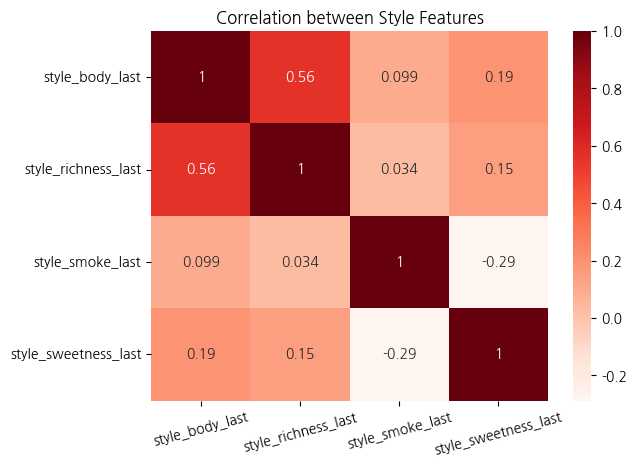

In [ ]:
style_cols = ['style_body_last', 'style_richness_last', 'style_smoke_last',
       'style_sweetness_last']

df[style_cols].describe()

# 히트맵으로 시각화
sns.heatmap(df[style_cols].corr(), annot=True, cmap="Reds")
plt.title("Correlation between Style Features")

plt.xticks(rotation=15)
plt.show()

### 스타일 지표와 다른 주요 지표 상관관계

In [ ]:

TARGETS = ["price(£)", "alcohol(%)","age_","vintage_clean","bottling_year","bottling_decade_clean"]
targets = [t for t in TARGETS if t in df.columns]
corr_tbl = (df[style_cols + targets]
            .corr()
            .loc[style_cols, targets]
            .sort_index())
display(corr_tbl)

,price(£),alcohol(%),age_,vintage_clean,bottling_year,bottling_decade_clean
style_body_last,0.001537,0.230324,0.194516,0.150176,0.028941,-0.058490
style_richness_last,0.007347,0.167398,0.142448,-0.334971,-0.107139,-0.001071
style_smoke_last,0.043938,-0.045405,-0.113712,-0.587072,-0.559452,-0.039018
style_sweetness_last,-0.002484,0.061585,0.103363,-0.341690,-0.108215,-0.033904


대부분의 변수와의 관계에서 미미한 상관관계를 보였지만 주목할 만한 변수들 세가지는,
- alcohol
- age
- bottling year : smoke가 높을수록 bottling year가 오래 전일 수 있지만 bottling year 결측치가 절반 이상임.
    * 하지만 가능한 해석은,
        과거(1970~1990년대 초반)에는 많은 증류소가 건조용 연료로 피트(peat)를 적극적으로 사용, 즉 오래전에 병입된 위스키일수록 스모키함이 강할 가능성은 존재함

### 스타일 지표와 가격 그리고 지역과의 관계

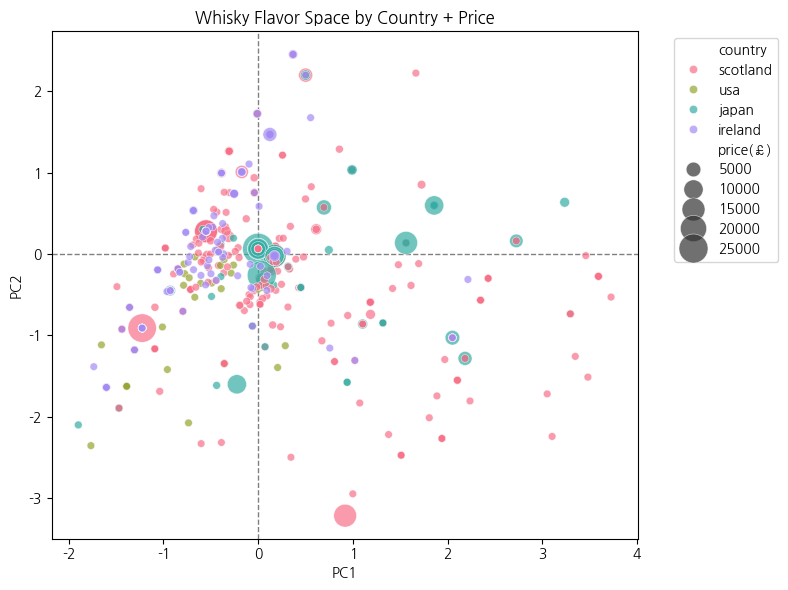

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
style_pca = pca.fit_transform(df[style_cols])

pd.DataFrame(pca.components_, columns=style_cols, index=["PC1", "PC2"])

fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(
    x=style_pca[:,0], y=style_pca[:,1],size=df["price(£)"],sizes=(30,500),
    hue=df["country"], palette="husl", alpha=0.7, ax=ax
)

# 0 기준선
ax.axvline(0, color="gray", linestyle="--", linewidth=1, zorder=0)
ax.axhline(0, color="gray", linestyle="--", linewidth=1, zorder=0)

ax.set_title("Whisky Flavor Space by Country + Price")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [ ]:
pd.DataFrame(pca.components_, columns=style_cols, index=["PC1", "PC2"])

,style_body_last,style_richness_last,style_smoke_last,style_sweetness_last
PC1,0.296647,0.377524,0.867036,-0.133135
PC2,0.461138,0.729448,-0.436260,0.254822


- pc1 : smoke 0.87 로 가장 큰 가중치를 가지고 있고 sweet -0.13 음의 상관 가집니다. smoke vs sweet 의 대조축으로 해석할 수 있습니다.
- pc2 : rich 0.73, body 0.46 으로 큰 상관을 가지고 0.43 smoke 음의 상관을 가집니다. rich/body vs smoke 축으로 해석할 수 있습니다.

- smoke 강하면서 rich/body도 높은 오른쪽 위 부분 : japan, scotland
- smoke 가 강한면서 rich/body가 낮은 오른쪽 아래 부분 : scotland, japan
- rich/body하면서 sweet 한 왼쪽 위 부분 : ireland, scotland
- 상대적으로 sweet 하면서 가볍고 부드러운 왼쪽 아래 : usa, scotland, ireland
- 균형 있는 중간 : scotland, ireland

      •	PCA를 통해 flavor 스타일 4차원을 2D 공간으로 축소한 결과,
    PC1은 Smoke–Sweet 축, PC2는 Body–Richness 축으로 해석되었다.
      •	국가별로 flavor 문화가 뚜렷하게 구분되며,
    스코틀랜드는 여러 군데로 넓게 퍼져있고 , 미국은 smoke/sweet한 제품이 많고,
    일본은 균형있는 제품들이 많다. 아일랜드는 균형적이지만 전반적인 일본과 비교했을 때 달콤하고 일부는 리치하면서 바디감이 있는 제품들이 존재합니다.
      •	버블 크기로 본 가격 분포에서는,
        전반적으로 style 의 균형 및 복합성이 있을 때 가격도가 높다.
    

<Axes: xlabel='PC1', ylabel='PC2'>

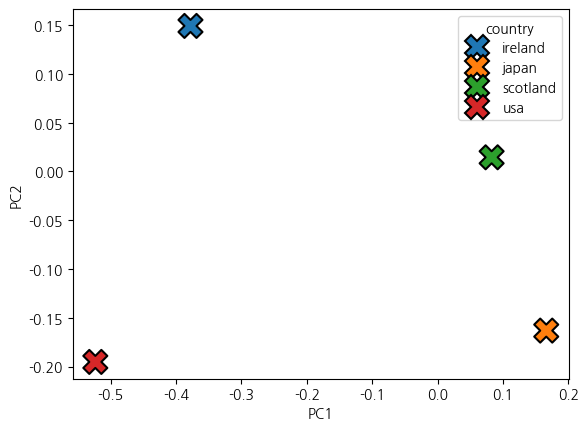

In [ ]:
centroids = (
    pd.DataFrame(style_pca, columns=["PC1","PC2"])
    .assign(country=df["country"])
    .groupby("country").mean().reset_index()
)
sns.scatterplot(
    data=centroids, x="PC1", y="PC2",
    hue="country", s=300, marker="X", edgecolor="black", linewidth=1.5
)

# 가격과의 관계

### ABV vs Price 관계는 ?

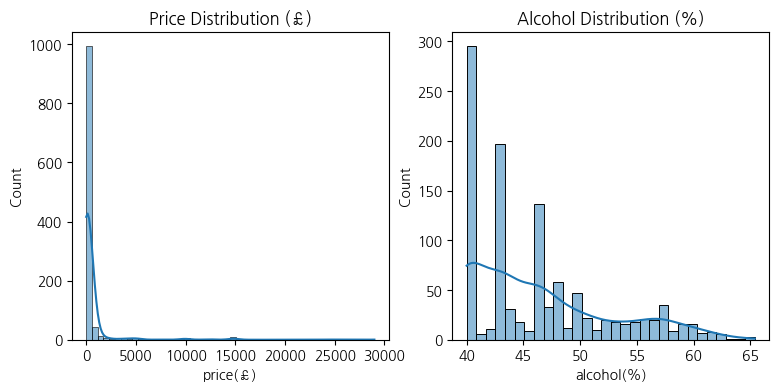

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(9,4))
sns.histplot(df["price(£)"], bins=50, ax=axes[0], kde=True)
axes[0].set_title("Price Distribution (£)")

sns.histplot(df["alcohol(%)"], bins=30, ax=axes[1], kde=True)
axes[1].set_title("Alcohol Distribution (%)")
plt.show()

In [ ]:
BACKEND= "plotly"
XCOL, YCOL = "alcohol(%)", "price(£)"

d = df.dropna(subset=[XCOL, YCOL]).copy()
if BACKEND.lower() == "plotly":
    import plotly.express as px
    fig = px.scatter(d, x=XCOL, y=YCOL, opacity=0.7, trendline="ols", trendline_color_override="black",
                     title=f"{XCOL} vs {YCOL}", template="plotly_white")
    fig.update_traces(marker=dict(size=7))
    fig.show()
else:
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set_theme(style="whitegrid", font_scale=1.05)
    plt.figure(figsize=(6.8,4.2))
    sns.regplot(data=d, x=XCOL, y=YCOL, scatter_kws={"alpha":0.6, "s":30}, line_kws={"lw":2})
    plt.title(f"{XCOL} vs {YCOL}")
    plt.tight_layout(); plt.show()

### 지역별 가격 차이

In [ ]:
df.groupby("country").agg(
    count=("name", "count"),
    med_price=("price(£)", "median"),
    avg_price=("price(£)", "mean"),
    med_abv=("alcohol(%)", "median"),
    avg_abv=("alcohol(%)", "mean"),
).sort_values("count", ascending=False)

,count,med_price,avg_price,med_abv,avg_abv
country,,,,,
scotland,812,112.000,371.503768,43.0,45.830813
ireland,120,59.000,160.228750,46.0,46.120000
japan,96,236.500,2875.400000,48.0,49.050000
usa,72,53.625,60.593750,47.0,48.061806


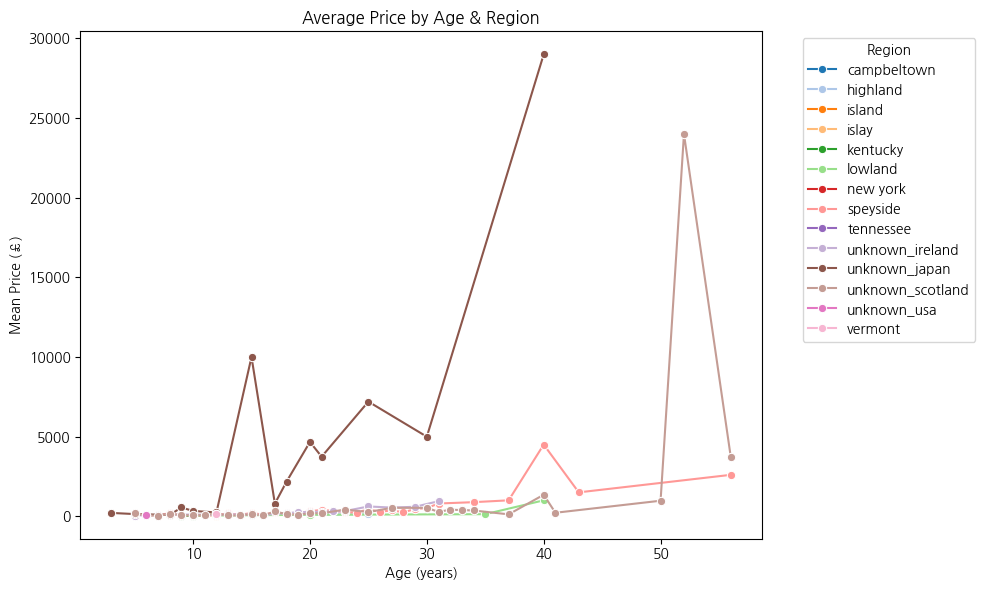

In [ ]:
# ---------------------------------------- Region × Age 평균 가격 ----------------------------------------------
grp = (df.dropna(subset=["age_", "price(£)", "region"])
         .groupby(["region", "age_"])
         ["price(£)"].mean()
         .reset_index())

plt.figure(figsize=(10,6))
sns.lineplot(
    data=grp,
    x="age_", y="price(£)", hue="region", marker="o",
    palette=sns.color_palette("tab20", n_colors=len(grp["region"].unique()))
)
plt.title("Average Price by Age & Region")
plt.xlabel("Age (years)"); plt.ylabel("Mean Price (£)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Region")
plt.tight_layout()
plt.show()

# Age 특성

### 무연식 위스키는 소비자에게 어떻게 받아들여질까?

#### 가격 인식

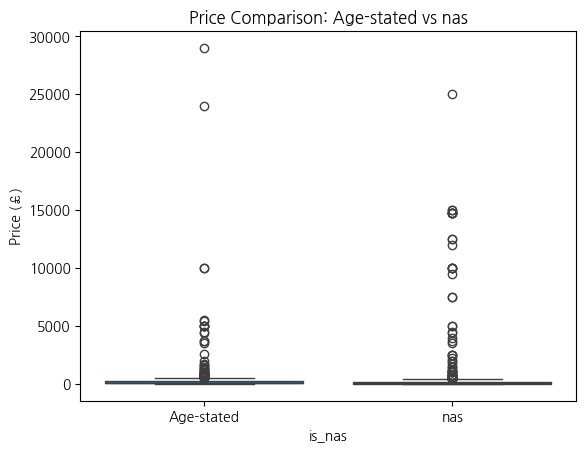

T-stat: 1.246, p-value: 0.213


In [ ]:
sns.boxplot(x="is_nas", y="price(£)", data=df)
plt.xticks([0,1], ["Age-stated", "nas"])
plt.title("Price Comparison: Age-stated vs nas")
plt.ylabel("Price (£)")
plt.show()

# 통계 검정
from scipy.stats import ttest_ind
nas_price = df.loc[df["is_nas"]==1, "price(£)"]
age_price = df.loc[df["is_nas"]==0, "price(£)"]
t_stat, p_val = ttest_ind(nas_price, age_price, equal_var=False)
print(f"T-stat: {t_stat:.3f}, p-value: {p_val:.3f}")

In [ ]:
df[(df['is_nas']== 1)  & (df['price(£)'] > 5000)]

,name,main_info,whisky_type,volume(cl),alcohol(%),price(£),style_body_last,style_richness_last,style_smoke_last,style_sweetness_last,characters,food_paring,bottler,bottling_decade_clean,bottler_canon,is_independent,bottling_year,age,age_,age_int,is_nas,country,region,casktype,cask_group,colouring,vintage,vintage_clean,nose,palate,finish,reviews,_text_all,price_per_cl,alcohol_density,smoky_family,fruity_family,floral_family,herbal_family,sweet_family,nutty_family,spicy_family,woody_family,earthy_family,malty_family,creamy_family,wine_family,marine_family,other_family,rarity_scarcity,rarity_price_premium,rarity_distillery,rarity_vintage,rarity_score
167,Royal Salute House of Quinn by Richard Quinn,blended scotch whisky,blended,70.0,49.8,9500.0,3.1,3.0,0.8,3.0,no description,NaN,NaN,NaN,distillery bottling,0,NaN,NaN,NaN,17.584416,1,scotland,unknown_scotland,not specified,unknown,Unknown,NaN,NaN,no description,no description,no description,NaN,no description no description no description n...,135.714286,3486.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.690375,0.000000,0.0,0.409535
195,Royal Salute Platinum JubileePearl & Diamond B...,blended scotch whiskychivas brothers,blended,70.0,50.8,14775.0,3.1,3.0,0.8,3.0,no description,NaN,chivas brothers,NaN,chivas brothers,0,NaN,NaN,NaN,17.584416,1,scotland,unknown_scotland,not specified,unknown,Unknown,NaN,NaN,no description,no description,no description,NaN,no description no description no description n...,211.071429,3556.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.047268,0.910596,0.000000,0.0,0.568211
196,Royal Salute Platinum JubileeQueen Mary Brooch...,blended scotch whiskychivas brothers,blended,70.0,50.8,14775.0,3.0,0.0,3.0,3.0,"Orange, Clove, Dried Fruit, Caramel, Ginger, A...",NaN,chivas brothers,NaN,chivas brothers,0,NaN,NaN,NaN,17.584416,1,scotland,unknown_scotland,not specified,unknown,Unknown,NaN,NaN,no description,no description,no description,NaN,orange clove dried fruit caramel ginger almond...,211.071429,3556.0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0.047268,0.910596,0.000000,0.0,0.568211
197,Royal Salute Platinum JubileeRichmond Brooch (...,blended scotch whiskychivas brothers,blended,70.0,50.8,14775.0,3.0,3.0,0.0,3.0,"Orange, Dried Fruit, Clove, Caramel, Ginger, A...",NaN,chivas brothers,NaN,chivas brothers,0,NaN,NaN,NaN,17.584416,1,scotland,unknown_scotland,not specified,unknown,Unknown,NaN,NaN,no description,no description,no description,NaN,orange dried fruit clove caramel ginger almond...,211.071429,3556.0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0.047268,0.910596,0.000000,0.0,0.568211
198,Royal Salute Platinum JubileeTeck Corsage Broo...,blended scotch whiskychivas brothers,blended,70.0,50.8,14775.0,3.0,3.0,0.0,3.0,"Orange, Dried Fruit, Clove, Caramel, Ginger, A...",NaN,chivas brothers,NaN,chivas brothers,0,NaN,NaN,NaN,17.584416,1,scotland,unknown_scotland,not specified,unknown,Unknown,NaN,NaN,no description,no description,no description,NaN,orange dried fruit clove caramel ginger almond...,211.071429,3556.0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0.047268,0.910596,0.000000,0.0,0.568211
199,Royal Salute Platinum JubileeQueen Adelaide's ...,blended scotch whiskychivas brothers,blended,70.0,50.8,14775.0,3.0,3.0,0.0,3.0,"Orange, Dried Fruit, Clove, Caramel, Ginger, A...",NaN,chivas brothers,NaN,chivas brothers,0,NaN,NaN,NaN,17.584416,1,scotland,unknown_scotland,not specified,unknown,Unknown,NaN,NaN,no description,no description,no description,NaN,orange dried fruit clove caramel ginger almond...,211.071429,3556.0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0.047268,0.910596,0.000000,0.0,0.568211
200,Royal Salute Platinum JubileeKent Amethyst Bro...,blended scotch whiskychivas brothers,blended,70.0,50.8,14775.0,3.1,3.0,0.8,3.0,no description,NaN,chivas brothers,NaN,chivas brothers,0,NaN,NaN,NaN,17.584416,1,scotland,unknown_scotland,not specified,unknown,Unknown,NaN,NaN,no description,no description,no description,NaN,no description no description no description n...,211.071429,3556.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.047268,0.910596,0.0000

T-stat: 1.246, p-value: 0.213


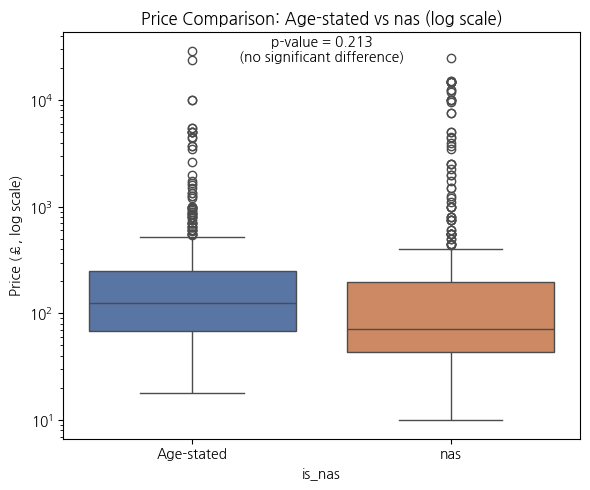

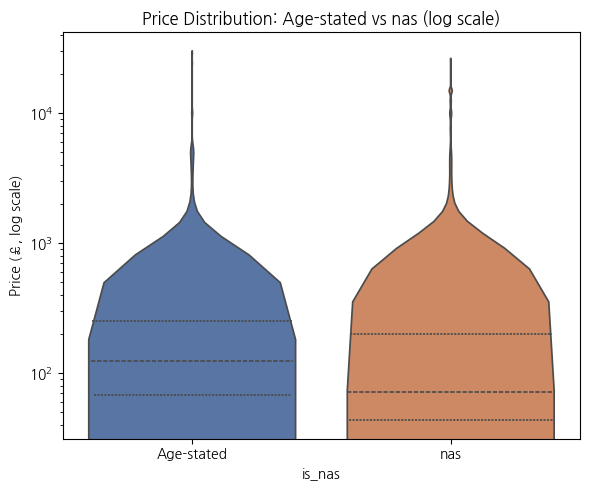

In [ ]:
nas_price = df.loc[df["is_nas"] == 1, "price(£)"].dropna()
age_price = df.loc[df["is_nas"] == 0, "price(£)"].dropna()


t_stat, p_val = ttest_ind(nas_price, age_price, equal_var=False)
print(f"T-stat: {t_stat:.3f}, p-value: {p_val:.3f}")

plt.figure(figsize=(6,5))
sns.boxplot(
    x="is_nas", y="price(£)", data=df,
    palette=["#4C72B0", "#DD8452"]
)
plt.yscale("log")
plt.xticks([0,1], ["Age-stated", "nas"])
plt.title("Price Comparison: Age-stated vs nas (log scale)")
plt.ylabel("Price (£, log scale)")


plt.text(
    x=0.5, y=df["price(£)"].max() * 0.8,
    s=f"p-value = {p_val:.3f}\n(no significant difference)",
    ha="center", fontsize=10, color="black"
)
plt.tight_layout()
plt.show()


plt.figure(figsize=(6,5))
sns.violinplot(
    x="is_nas", y="price(£)", data=df,
    scale="width", inner="quartile",
    palette=["#4C72B0", "#DD8452"]
)
plt.yscale("log")
plt.xticks([0,1], ["Age-stated", "nas"])
plt.title("Price Distribution: Age-stated vs nas (log scale)")
plt.ylabel("Price (£, log scale)")
plt.tight_layout()
plt.show()

#### 풍미 특성

In [ ]:
import plotly.graph_objects as go
style_cols = ["style_body_last", "style_richness_last", "style_smoke_last", "style_sweetness_last"]

style_comp = (
    df.groupby("is_nas")[style_cols]
      .mean()
      .rename(index={0: "Age-stated", 1: "nas"})
)


categories = style_cols

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=style_comp.loc["Age-stated"].values,
    theta=categories,
    fill='toself',
    name='Age-stated',
    line_color='#4C72B0',
    fillcolor='rgba(76, 114, 176, 0.3)'
))

fig.add_trace(go.Scatterpolar(
    r=style_comp.loc["nas"].values,
    theta=categories,
    fill='toself',
    name='nas',
    line_color='#DD8452',
    fillcolor='rgba(221, 132, 82, 0.3)'
))


fig.update_layout(
    title="Flavor Profile Comparison (Age-stated vs nas)",
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(style_comp.max()) * 1.1],
            tickfont=dict(size=11)
        ),
        angularaxis=dict(
            tickfont=dict(size=12)
        )
    ),
    showlegend=True,
    legend=dict(x=0.85, y=1.05, bgcolor='rgba(255,255,255,0.5)')
)

fig.show()

In [ ]:
from scipy.stats import ttest_ind

style_cols = ["style_body_last", "style_richness_last", "style_smoke_last", "style_sweetness_last"]

for col in style_cols:
    nas_vals = df.loc[df["is_nas"]==1, col].dropna()
    age_vals = df.loc[df["is_nas"]==0, col].dropna()
    t, p = ttest_ind(nas_vals, age_vals, equal_var=False)
    print(f"{col:<20} t={t:.3f}, p={p:.3f}")

style_body_last      t=-7.423, p=0.000
style_richness_last  t=-5.910, p=0.000
style_smoke_last     t=3.931, p=0.000
style_sweetness_last t=-4.615, p=0.000


✳️

      •	Age-stated 위스키가 NAS보다 Body, Richness, Sweetness 세 항목에서 통계적으로 유의하게 높았다 (p < 0.05).
      •	즉, Age-stated 제품은 더 묵직하고, 풍부하며, 단맛이 도는 숙성 풍미를 가진 반면, NAS 위스키는 상대적으로 라이트하고 드라이한(덜 단) 스타일로 나타났다.


#### 나라별 연식 표기 비율

In [ ]:
nas_by_country = df.groupby('country')['is_nas'].mean().reset_index().sort_values(by='is_nas').rename(columns={'is_nas': 'nas_ratio'})

fig = px.bar(nas_by_country,
             x='country',
             y='nas_ratio',
             text='nas_ratio',
             color='nas_ratio',
             color_continuous_scale="Oranges",
              title="나라별 연식 표기 비율")
fig.update_traces(texttemplate='%{text:.1%}', textposition='outside')
fig.update_layout(yaxis_title="NAS Ratio (%)", xaxis_title="Country")
fig.show()

        •	참고로 본 분석에 사용된 데이터는 각 국가의 위스키 중 일부 브랜드를 중심으로  구성되어 있어, 국가 전체 시장을 대표한다고 보긴 어렵다.
        •	따라서 본 결과는 데이터 샘플 내 경향성으로 해석하며,
          NAS 비중이 상대적으로 높은 국가(예: 미국, 아일랜드)는
          숙성 연한보다는 시장 대응력·접근성 중심의 제품 라인업 전략을 채택하고 있음을 시사한다.
        - NAS는 예외적인 제품이 아니라, 글로벌 위스키 시장의 주류 전략으로도 볼 수 있을 거 같다.

# 고가/희귀 위스키

### 고가 위스키일수록 flavor variance가 좋아지나?

앞서 style과 지역별 차이를 2차원으로 시각화 했을 때, 고가 위스키 일수록 style 지표의 균형을 보였습니다. 이에 대해 정량적으로 다시 확인해보았습니다.

	•	귀무가설(H₀): 위스키 가격과 flavor variance 간에는 상관이 없다.
	•	대립가설(H₁): 가격이 높을수록 flavor variance(풍미 다양성)가 커진다.

Correlation: -0.09480001103867002


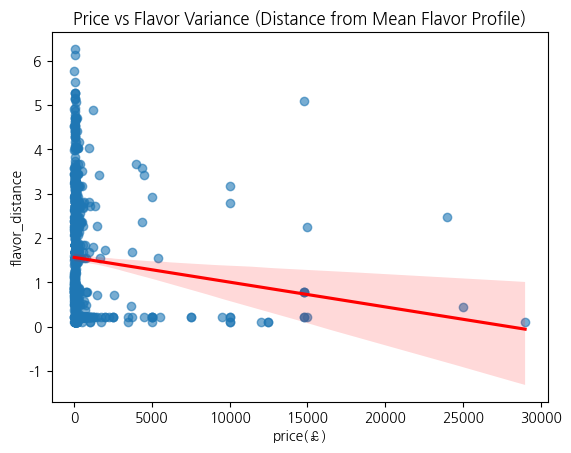

In [ ]:
style_cols = ["style_body_last", "style_richness_last", "style_smoke_last", "style_sweetness_last"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df[style_cols])

#가격과의 상관관계
df["flavor_distance"] = np.linalg.norm(X - X.mean(axis=0), axis=1)

df["price(£)"] = pd.to_numeric(df["price(£)"], errors="coerce")
df.dropna(subset=["price(£)", "flavor_distance"], inplace=True)

corr = df["price(£)"].corr(df["flavor_distance"])
print("Correlation:", corr)

#시각화
sns.regplot(
    x="price(£)", y="flavor_distance", data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'}
)
plt.title("Price vs Flavor Variance (Distance from Mean Flavor Profile)")
plt.show()

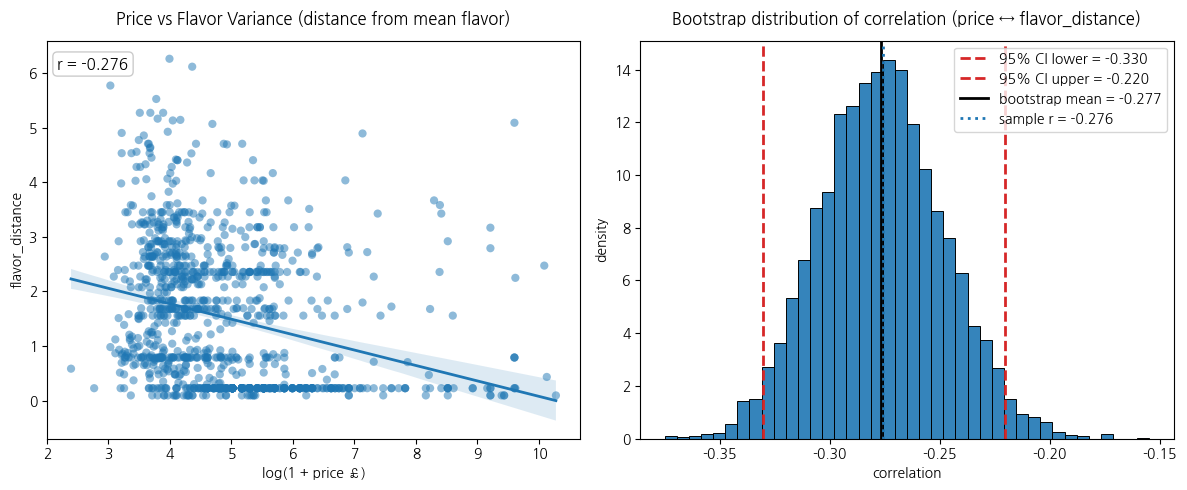


[결과]
Sample correlation (r): -0.2760
Bootstrap mean corr   : -0.2766
95% CI (bootstrap)    : [-0.3303, -0.2205]
n (effective)         : 1100


In [ ]:
# --- 설정 ---
USE_LOG_PRICE = True        # True면 로그, False면 원가격 사용
N_BOOT = 5000               # 부트스트랩 반복 수
RANDOM_STATE = 42

rng = np.random.default_rng(RANDOM_STATE) # 난수 생성기


style_cols = ["style_body_last", "style_richness_last", "style_smoke_last", "style_sweetness_last"]

# 1) flavor_distance  계산 : 전체 평균 풍미에서 각 위스키들이 얼마나 떨어져 있는지 계산한다.
from sklearn.preprocessing import StandardScaler
X = df[style_cols].copy()
X = X.apply(pd.to_numeric, errors="coerce")
X = X.dropna()

scaler = StandardScaler()
Xz = scaler.fit_transform(X.values)

# 각 위스키 풍미 - 전체 평균 (각 행의 길이 계산) : 유클리디안 놈 사용
flavor_distance = np.linalg.norm(Xz - Xz.mean(axis=0), axis=1)
df_fd = df.loc[X.index].copy()
df_fd["flavor_distance"] = flavor_distance

# 2) 가격 컬럼 정리 + 고가 제품은 소수이므로 로그 사용함
df_fd["price(£)"] = pd.to_numeric(df_fd["price(£)"], errors="coerce")
df_fd = df_fd.dropna(subset=["price(£)", "flavor_distance"]).copy()
if USE_LOG_PRICE:
    df_fd["price_x"] = np.log1p(df_fd["price(£)"])
    xlabel = "log(1 + price £)"
else:
    df_fd["price_x"] = df_fd["price(£)"]
    xlabel = "price (£)"

#표본 상관계수 계산
corr_point = df_fd["price_x"].corr(df_fd["flavor_distance"])

# 부트스트랩으로 상관계수 분포와 CI추정
corrs = np.empty(N_BOOT)
n = len(df_fd)
for i in range(N_BOOT):
    idx = rng.integers(0, n, n)      # 같은 길이로 복원추출
    s = df_fd.iloc[idx]
    corrs[i] = s["price_x"].corr(s["flavor_distance"])

ci_low, ci_high = np.percentile(corrs, [2.5, 97.5])
mean_corr = corrs.mean()

# 시각화
plt.figure(figsize=(12, 5))

# (A) 산점도 + 회귀선
plt.subplot(1, 2, 1)
sns.regplot(
    x="price_x", y="flavor_distance",
    data=df_fd, scatter_kws={"alpha":0.5, "s":35, "edgecolor":"none"},
    line_kws={"linewidth":2}
)
plt.title("Price vs Flavor Variance (distance from mean flavor)", pad=12)
plt.xlabel(xlabel)
plt.ylabel("flavor_distance")
# 주석: 단일 상관계수
plt.annotate(
    f"r = {corr_point:.3f}",
    xy=(0.02, 0.93), xycoords="axes fraction",
    fontsize=11, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="0.8")
)

# (B) 부트스트랩 분포 히스토그램 + 95% CI
plt.subplot(1, 2, 2)
sns.histplot(corrs, bins=40, stat="density", alpha=0.9)
plt.axvline(ci_low, color="tab:red", linestyle="--", linewidth=2, label=f"95% CI lower = {ci_low:.3f}")
plt.axvline(ci_high, color="tab:red", linestyle="--", linewidth=2, label=f"95% CI upper = {ci_high:.3f}")
plt.axvline(mean_corr, color="black", linestyle="-", linewidth=2, label=f"bootstrap mean = {mean_corr:.3f}")
plt.axvline(corr_point, color="tab:blue", linestyle=":", linewidth=2, label=f"sample r = {corr_point:.3f}")
plt.title("Bootstrap distribution of correlation (price ↔ flavor_distance)", pad=12)
plt.xlabel("correlation")
plt.ylabel("density")
plt.legend(frameon=True)

plt.tight_layout()
plt.show()

# 요약 출력
print(f"\n[결과]")
print(f"Sample correlation (r): {corr_point:.4f}")
print(f"Bootstrap mean corr   : {mean_corr:.4f}")
print(f"95% CI (bootstrap)    : [{ci_low:.4f}, {ci_high:.4f}]")
print(f"n (effective)         : {len(df_fd)}")

	•	Bootstrap 상관분석
    표본 1,100개를 바탕으로 복원추출(bootstrap) 방식으로 5,000회 반복 샘플링을 수행하여
    매번 피어슨 상관계수(r)를 계산했습니다.
    이후 5,000개의 상관계수 분포로부터 95% 신뢰구간(Percentile Method) 을 추정했습니다.

-------
    부트스트랩 분포의 중심은 약 −0.28 근처이며,
    95%의 상관계수가 −0.33에서 −0.22 사이에 분포합니다.
    이 구간이 0을 포함하지 않기 때문에,
    “가격과 풍미 다양성 간에는 유의미한 음의 관계가 존재한다”고 해석할 수 있습니다.
------

    고가 위스키일수록 평균적인 풍미에 더 가깝고, 풍미적 일관성이 높은 경향을 보였습니다.
    반면, 저가 위스키는 풍미가 다양하게 분포하며, 개성이 뚜렷하지만 균질성이 낮은 특징을 보였습니다.

    	•	프리미엄 위스키는 개성보다는 조화·균형·정제된 풍미를 추구하고,
	    •	보급형 위스키는 풍미적 변동성이 크고, 브랜드·배치(batch)에 따라 맛의 차이가 다양합니다.
    


### 희귀 점수

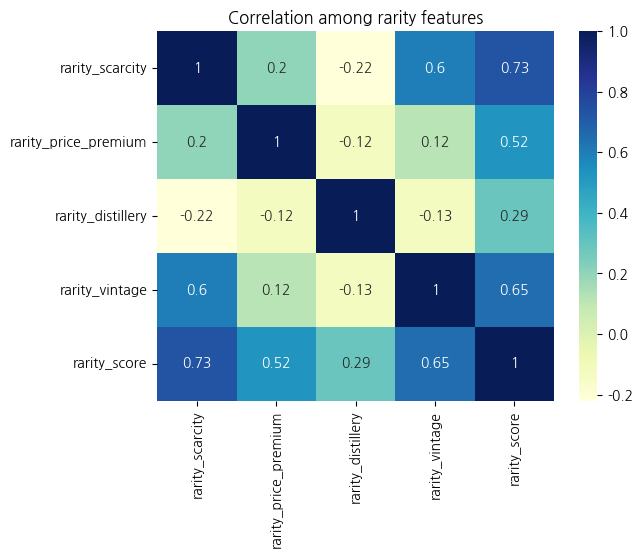

In [ ]:
rare_cols = ["rarity_scarcity","rarity_price_premium","rarity_distillery","rarity_vintage","rarity_score"]

sns.heatmap(df[rare_cols].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation among rarity features")
plt.show()

전체 희귀도(rarity_score)는 주로 Scarcity(0.73), Vintage(0.65), Price Premium(0.52)**에 의해 결정됨.
: 즉, 생산량이 적고 오래된 제품, 가격이 높은 제품일수록 희귀도가 높게 평가됨.

rarity_scarcity vs rarity_vintage (0.6)
: 오래된 빈티지일수록 NAS가 아니고 독립병입 등 희소성 특성을 함께 가지는 경향이 있음.
(즉, 시간적 희귀성과 공급 희소성이 결합되어 있음)



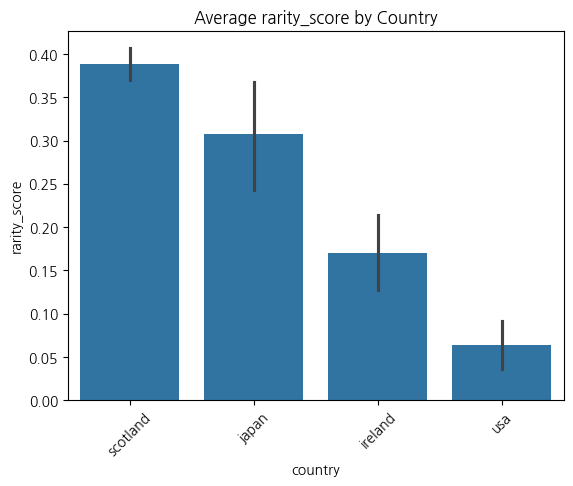

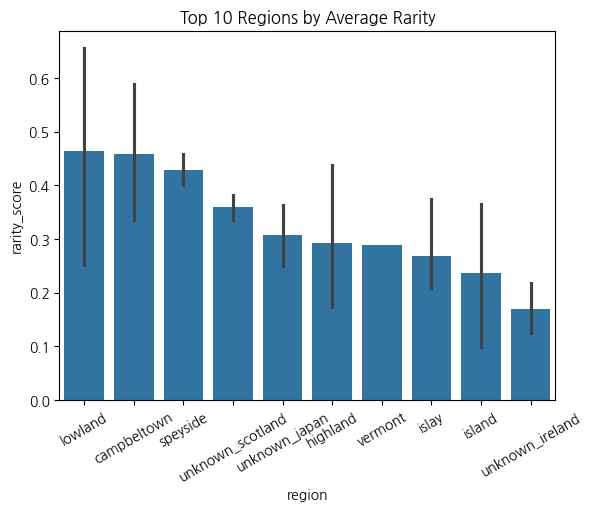

In [ ]:
sns.barplot(data=df, x="country", y="rarity_score", order=df.groupby("country")["rarity_score"].mean().sort_values(ascending=False).index)
plt.xticks(rotation=45)
plt.title("Average rarity_score by Country")
plt.show()

sns.barplot(data=df, x="region", y="rarity_score",
            order=df.groupby("region")["rarity_score"].mean().sort_values(ascending=False).index[:10])
plt.xticks(rotation=30)
plt.title("Top 10 Regions by Average Rarity")
plt.show()

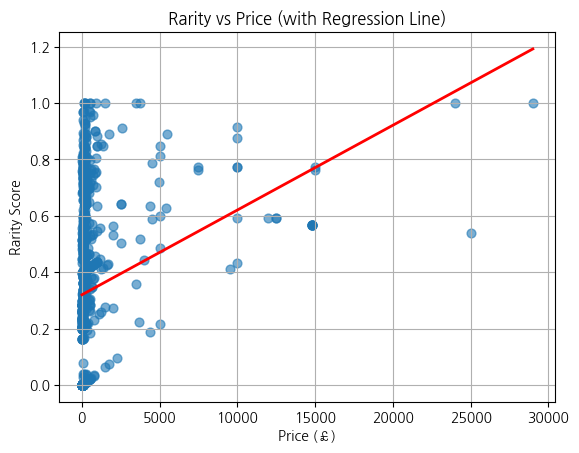

In [ ]:

sns.regplot(
    x="price(£)",
    y="rarity_score",
    data=df,
    scatter_kws={'alpha':0.6, 's':40},
    line_kws={'color':'red', 'lw':2},
    ci=None
)
plt.title("Rarity vs Price (with Regression Line)")
plt.xlabel("Price (£)")
plt.ylabel("Rarity Score")
plt.grid(True)
plt.show()

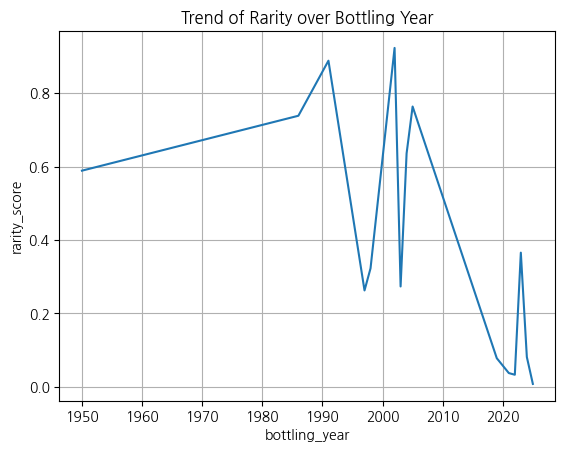

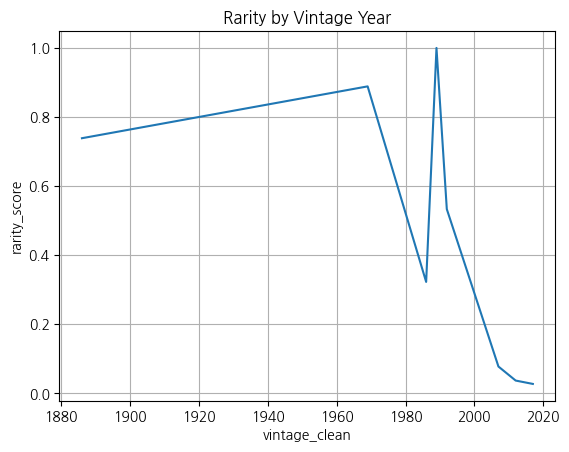

In [ ]:
sns.lineplot(data=df, x="bottling_year", y="rarity_score", ci=None)
plt.title("Trend of Rarity over Bottling Year")
plt.grid(True)
plt.show()

sns.lineplot(data=df, x="vintage_clean", y="rarity_score", ci=None)
plt.title("Rarity by Vintage Year")
plt.grid(True)
plt.show()

    *  bottling 의 경우 90년도 이전 그리고 vintage는 70년도
      이전에 모두 희귀 indicator에서 일관되게 높은 점수를 보임.


In [ ]:
df_top = df.sort_values("rarity_score", ascending=False).head(10)
df_top[["name", "bottler_canon", "country", "price(£)", "rarity_score"]]

,name,bottler_canon,country,price(£),rarity_score
1070,Red Spot 199131 Year Old Marsala Cask Exclusiv...,the whisky exchange,ireland,945.0,1.0
953,Speyside Region 197343 Year Old Whisky Agency ...,the whisky agency,scotland,1500.0,1.0
813,Karuizawa 40 Year OldPlatinum Geisha,distillery bottling,japan,29000.0,1.0
833,SMWS 116.19 (Yoichi)1994 20 Year Old,scotch malt whisky society,japan,3500.0,1.0
728,Glen Grant 1977McBain & Charles Bot.1980s,mcbain & charles,scotland,550.0,1.0
737,SMWS 76.29 (Mortlach)1989 Bot.2002 13 Year Old,scotch malt whisky society,scotland,500.0,1.0
627,Glen Moray 200619 Year Old North Star Series 25,north star spirits,scotland,125.0,1.0
683,Inchgower 199520 Year Old Blackadder,blackadder,scotland,218.0,1.0
255,The Last Drop 56 Year Old Blended WhiskyReleas...,the last drop,scotland,3750.0,1.0
265,Royal Salute 52 Year OldTime Series,distillery bottling,scotland,24000.0,1.0
